In [1]:
import pandas as pd

df = pd.read_csv('../data/profile_data_2.csv')

In [2]:
df.isna().sum()

skills_adv             1840
skills_int              819
skills_fun              820
rank                     35
username                 36
language                198
solved easy              34
solved easy beats        35
solved medium            34
solved medium beats    1368
solved hard              34
solved hard beats      4394
subs                    136
active days              79
recent                  261
dtype: int64

In [4]:
df = df[df['skills_adv'].notna()]

In [5]:
df.isna().sum()

skills_adv                0
skills_int                6
skills_fun                7
rank                      1
username                  1
language                  0
solved easy               0
solved easy beats         1
solved medium             0
solved medium beats     421
solved hard               0
solved hard beats      3039
subs                     70
active days              34
recent                   40
dtype: int64

In [6]:
df = df[df['recent'].notna()]

In [7]:
df.isna().sum()

skills_adv                0
skills_int                6
skills_fun                7
rank                      1
username                  1
language                  0
solved easy               0
solved easy beats         0
solved medium             0
solved medium beats     421
solved hard               0
solved hard beats      3031
subs                     37
active days               1
recent                    0
dtype: int64

In [8]:
df.count()

skills_adv             10645
skills_int             10639
skills_fun             10638
rank                   10644
username               10644
language               10645
solved easy            10645
solved easy beats      10645
solved medium          10645
solved medium beats    10224
solved hard            10645
solved hard beats       7614
subs                   10608
active days            10644
recent                 10645
dtype: int64

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df['active days'], bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Alternatively, you can use Seaborn for a more visually appealing plot
sns.histplot(data=df, x='active days', bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [10]:
df.dtypes

skills_adv              object
skills_int              object
skills_fun              object
rank                    object
username                object
language                object
solved easy            float64
solved easy beats       object
solved medium          float64
solved medium beats     object
solved hard            float64
solved hard beats       object
subs                    object
active days             object
recent                  object
dtype: object

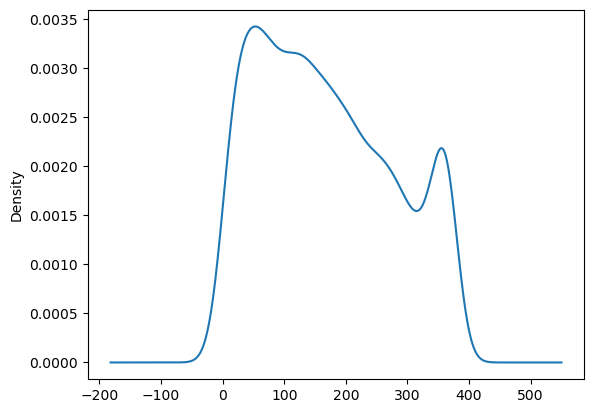

In [35]:
ax = df['active_days'].plot(kind='kde')

In [11]:
df['active_days'] = pd.to_numeric(df['active days'], errors='coerce')

In [12]:
df['active_days'].isna().sum()

37

In [16]:
(df[df['active_days'] > 29]).count()

skills_adv             7787
skills_int             7787
skills_fun             7787
rank                   7787
username               7787
language               7787
solved easy            7787
solved easy beats      7787
solved medium          7787
solved medium beats    7754
solved hard            7787
solved hard beats      6614
subs                   7787
active days            7787
recent                 7787
active_days            7787
dtype: int64

In [15]:
df_with_30_active_days = df[df['active_days'] > 15]

In [17]:
df_with_30_active_days.drop('active days', axis=1, inplace = True)

/var/folders/pk/w6h5h66j3y326fzy7tzbn55c0000gn/T/ipykernel_98714/2383564599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_30_active_days.drop('active days', axis=1, inplace = True)


In [18]:
def processSkills(skills):
    ans = []
    for my_string in skills.split(','):
        last_index = my_string.rfind('x')

        if last_index != -1:
            # Replace the last occurrence of 'o' with '-'
            modified_string = my_string[:last_index] + '-' + my_string[last_index + 1:]
        else:
            # If 'o' is not found in the string
            modified_string = my_string
        
        ans.append(modified_string)
    return ",".join(ans)

In [19]:
processSkills("Dynamic Programmingx16,Rolling Hashx8")

'Dynamic Programming-16,Rolling Hash-8'

In [20]:
df_with_30_active_days['adv_skills'] = df_with_30_active_days['skills_adv'].apply(lambda x : processSkills(x))
df_with_30_active_days['int_skills'] = df_with_30_active_days['skills_int'].apply(lambda x : processSkills(x))
df_with_30_active_days['fund_skills'] = df_with_30_active_days['skills_fun'].apply(lambda x : processSkills(x))



/var/folders/pk/w6h5h66j3y326fzy7tzbn55c0000gn/T/ipykernel_98714/796348624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_30_active_days['adv_skills'] = df_with_30_active_days['skills_adv'].apply(lambda x : processSkills(x))
/var/folders/pk/w6h5h66j3y326fzy7tzbn55c0000gn/T/ipykernel_98714/796348624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_30_active_days['int_skills'] = df_with_30_active_days['skills_int'].apply(lambda x : processSkills(x))
/var/folders/pk/w6h5h66j3y326fzy7tzb

In [21]:
df_with_30_active_days = df_with_30_active_days.drop(columns=['skills_adv', 'skills_int', 'skills_fun'], axis=1)

In [22]:
df_with_30_active_days.isna().sum()

rank                      0
username                  0
language                  0
solved easy               0
solved easy beats         0
solved medium             0
solved medium beats     124
solved hard               0
solved hard beats      2045
subs                      0
recent                    0
active_days               0
adv_skills                0
int_skills                0
fund_skills               0
dtype: int64

In [23]:
df_with_30_active_days['language'] = df_with_30_active_days['language'].fillna("")

In [24]:
import numpy as np

In [26]:
def remove_percentage(percentage_value):
    if(type(percentage_value) == int or type(percentage_value) == float):
        return percentage_value
    try:
        return float(percentage_value.strip('%'))
    except ValueError:
        # If the input value is not a valid percentage, return None or raise an exception, depending on your requirements
        return np.NaN

In [27]:
df_with_30_active_days['solved easy beats'] = df_with_30_active_days['solved easy beats'].apply(lambda x : remove_percentage(x))
df_with_30_active_days['solved medium beats'] = df_with_30_active_days['solved medium beats'].apply(lambda x : remove_percentage(x))
df_with_30_active_days['solved hard beats'] = df_with_30_active_days['solved hard beats'].apply(lambda x : remove_percentage(x))


In [28]:
df_with_30_active_days

,rank,username,language,solved easy,solved easy beats,solved medium,solved medium beats,solved hard,solved hard beats,subs,recent,active_days,adv_skills,int_skills,fund_skills
2,"289,245",Shiv,"C++_258,Java_8,JavaScript_3",141.0,95.3,109.0,87.3,16.0,73.8,724,"Intersection of Two Arrays II,N-th Tribonacci ...",185.0,"Dynamic Programming-31,Divide and Conquer-9,Ba...","Hash Table-49,Math-47,Tree-29,Binary Tree-29,B...","Array-121,String-52,Two Pointers-47,Sorting-31..."
3,"55,937",Utkarsh Tripathi,"C++_511,Java_144,JavaScript_23",201.0,98.1,336.0,98.0,80.0,96.2,538,"Longest Ideal Subsequence,N-th Tribonacci Numb...",169.0,"Dynamic Programming-110,Backtracking-24,Divide...","Hash Table-125,Depth-First Search-84,Tree-79,G...","Array-311,String-138,Sorting-90,Two Pointers-6..."
4,"199,760",Nitin Bargaje,"Java_203,Python3_93,C++_37",121.0,93.5,182.0,93.4,35.0,87.6,621,"Longest Ideal Subsequence,N-th Tribonacci Numb...",189.0,"Dynamic Programming-58,Backtracking-13,Union F...","Hash Table-65,Math-48,Breadth-First Search-45,...","Array-168,String-82,Sorting-45,Two Pointers-30..."
6,"311,093",sdblg,"Go_179,Java_92,MySQL_8",141.0,95.3,103.0,86.5,8.0,58.4,410,"Fibonacci Number,Sum of Numbers With Units Dig...",91.0,"Dynamic Programming-16,Union Find-9,Divide and...","Hash Table-64,Depth-First Search-38,Tree-36,Ma...","Array-100,String-68,Two Pointers-43,Sorting-35..."
7,"224,011",Akshara Ramagiri,"C++_313,Java_24",119.0,93.3,166.0,92.4,31.0,85.8,704,"Longest Ideal Subsequence,N-th Tribonacci Numb...",211.0,"Dynamic Programming-43,Backtracking-14,Monoton...","Hash Table-65,Math-47,Binary Search-36,Greedy-...","Array-184,String-93,Sorting-56,Two Pointers-44..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12518,"424,473",Shivani Dubey,Python3_200,132.0,94.6,61.0,78.2,7.0,55.2,199,"Freedom Trail,Minimum Falling Path Sum II,Long...",40.0,"Dynamic Programming-18,Divide and Conquer-8,Mo...","Hash Table-38,Math-34,Depth-First Search-21,Bi...","Array-96,String-61,Two Pointers-34,Sorting-26,..."
12520,"230,014",Esha Agarwal,"C++_237,Java_121",115.0,92.9,170.0,92.7,25.0,82.1,171,"Longest Increasing Subsequence,Reverse Nodes i...",44.0,"Dynamic Programming-62,Backtracking-16,Divide ...","Depth-First Search-57,Hash Table-55,Tree-51,Bi...","Array-145,String-72,Two Pointers-39,Sorting-33..."
12522,"281,897",ANGSHUMAN MAJUMDAR,"C++_112,Java_93,Python3_44",63.0,82.5,167.0,92.5,41.0,89.7,343,"Freedom Trail,Is Subsequence,Minimum Falling P...",64.0,"Dynamic Programming-48,Backtracking-23,Divide ...","Hash Table-50,Depth-First Search-35,Tree-34,Bi...","Array-120,String-67,Two Pointers-33,Sorting-27..."
12523,"168,127",Vicky kaushal,"Java_296,MySQL_68,JavaScript_6",190.0,97.7,160.0,92.0,25.0,82.1,524,"Freedom Trail,Minimum Falling Path Sum II,Long...",163.0,"Dynamic Programming-48,Backtracking-6,Divide a...","Hash Table-71,Database-68,Math-40,Greedy-31,De...","Array-164,String-90,Sorting-49,Two Pointers-45..."


In [29]:
df_with_30_active_days.to_csv("../data/user_data_active_15_days_2.csv")

In [31]:
df_with_30_active_days.index.values

array([    2,     3,     4, ..., 12522, 12523, 12524])

In [1]:
import pandas as pd 
df = pd.read_csv('../data/user_data_active_15_days_2.csv')

In [2]:
df['recent']

0       Intersection of Two Arrays II,N-th Tribonacci ...
1       Longest Ideal Subsequence,N-th Tribonacci Numb...
2       Longest Ideal Subsequence,N-th Tribonacci Numb...
3       Fibonacci Number,Sum of Numbers With Units Dig...
4       Longest Ideal Subsequence,N-th Tribonacci Numb...
                              ...                        
9238    Freedom Trail,Minimum Falling Path Sum II,Long...
9239    Longest Increasing Subsequence,Reverse Nodes i...
9240    Freedom Trail,Is Subsequence,Minimum Falling P...
9241    Freedom Trail,Minimum Falling Path Sum II,Long...
9242    Freedom Trail,Minimum Falling Path Sum II,Long...
Name: recent, Length: 9243, dtype: object

In [6]:
probs = []
for _, row in df.iterrows():
    probs += row['recent'].split(',') 

In [9]:
import numpy as np
unique,counts = np.unique(probs, return_counts=True)
unique

array([' n)', '01 Matrix', '1-bit and 2-bit Characters', ...,
       'XOR Operation in an Array', 'XOR Queries of a Subarray',
       'Zigzag Conversion'], dtype='<U77')

In [10]:
print(np.asarray((unique, counts)).T)

[[' n)' '288']
 ['01 Matrix' '95']
 ['1-bit and 2-bit Characters' '13']
 ...
 ['XOR Operation in an Array' '44']
 ['XOR Queries of a Subarray' '6']
 ['Zigzag Conversion' '96']]


In [13]:
sorted(counts, reverse=True)

[6633,
 3760,
 3417,
 2870,
 2858,
 2679,
 2657,
 2655,
 2639,
 2603,
 2127,
 2119,
 2023,
 1996,
 1874,
 1872,
 1501,
 1496,
 1420,
 1343,
 984,
 818,
 738,
 687,
 662,
 655,
 642,
 637,
 629,
 596,
 566,
 556,
 548,
 528,
 518,
 508,
 476,
 466,
 447,
 443,
 436,
 435,
 426,
 425,
 425,
 420,
 417,
 401,
 398,
 397,
 391,
 375,
 374,
 374,
 354,
 354,
 352,
 349,
 346,
 346,
 346,
 346,
 344,
 342,
 337,
 337,
 332,
 329,
 325,
 318,
 316,
 309,
 305,
 301,
 300,
 295,
 295,
 292,
 289,
 288,
 288,
 288,
 285,
 283,
 281,
 280,
 279,
 279,
 278,
 275,
 268,
 263,
 259,
 257,
 255,
 255,
 251,
 250,
 250,
 246,
 246,
 244,
 243,
 243,
 240,
 239,
 237,
 233,
 232,
 232,
 230,
 228,
 223,
 223,
 220,
 217,
 217,
 214,
 213,
 212,
 212,
 210,
 210,
 208,
 204,
 201,
 200,
 198,
 193,
 192,
 191,
 189,
 189,
 187,
 186,
 185,
 183,
 181,
 178,
 176,
 176,
 176,
 176,
 173,
 170,
 170,
 169,
 169,
 168,
 168,
 167,
 166,
 164,
 162,
 162,
 160,
 159,
 159,
 157,
 156,
 154,
 153,
 152,
 1

In [16]:
df

,Unnamed: 0,rank,username,language,solved easy,solved easy beats,solved medium,solved medium beats,solved hard,solved hard beats,subs,recent,active_days,adv_skills,int_skills,fund_skills
0,2,"289,245",Shiv,"C++_258,Java_8,JavaScript_3",141.0,95.3,109.0,87.3,16.0,73.8,724,"Intersection of Two Arrays II,N-th Tribonacci ...",185.0,"Dynamic Programming-31,Divide and Conquer-9,Ba...","Hash Table-49,Math-47,Tree-29,Binary Tree-29,B...","Array-121,String-52,Two Pointers-47,Sorting-31..."
1,3,"55,937",Utkarsh Tripathi,"C++_511,Java_144,JavaScript_23",201.0,98.1,336.0,98.0,80.0,96.2,538,"Longest Ideal Subsequence,N-th Tribonacci Numb...",169.0,"Dynamic Programming-110,Backtracking-24,Divide...","Hash Table-125,Depth-First Search-84,Tree-79,G...","Array-311,String-138,Sorting-90,Two Pointers-6..."
2,4,"199,760",Nitin Bargaje,"Java_203,Python3_93,C++_37",121.0,93.5,182.0,93.4,35.0,87.6,621,"Longest Ideal Subsequence,N-th Tribonacci Numb...",189.0,"Dynamic Programming-58,Backtracking-13,Union F...","Hash Table-65,Math-48,Breadth-First Search-45,...","Array-168,String-82,Sorting-45,Two Pointers-30..."
3,6,"311,093",sdblg,"Go_179,Java_92,MySQL_8",141.0,95.3,103.0,86.5,8.0,58.4,410,"Fibonacci Number,Sum of Numbers With Units Dig...",91.0,"Dynamic Programming-16,Union Find-9,Divide and...","Hash Table-64,Depth-First Search-38,Tree-36,Ma...","Array-100,String-68,Two Pointers-43,Sorting-35..."
4,7,"224,011",Akshara Ramagiri,"C++_313,Java_24",119.0,93.3,166.0,92.4,31.0,85.8,704,"Longest Ideal Subsequence,N-th Tribonacci Numb...",211.0,"Dynamic Programming-43,Backtracking-14,Monoton...","Hash Table-65,Math-47,Binary Search-36,Greedy-...","Array-184,String-93,Sorting-56,Two Pointers-44..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,12518,"424,473",Shivani Dubey,Python3_200,132.0,94.6,61.0,78.2,7.0,55.2,199,"Freedom Trail,Minimum Falling Path Sum II,Long...",40.0,"Dynamic Programming-18,Divide and Conquer-8,Mo...","Hash Table-38,Math-34,Depth-First Search-21,Bi...","Array-96,String-61,Two Pointers-34,Sorting-26,..."
9239,12520,"230,014",Esha Agarwal,"C++_237,Java_121",115.0,92.9,170.0,92.7,25.0,82.1,171,"Longest Increasing Subsequence,Reverse Nodes i...",44.0,"Dynamic Programming-62,Backtracking-16,Divide ...","Depth-First Search-57,Hash Table-55,Tree-51,Bi...","Array-145,String-72,Two Pointers-39,Sorting-33..."
9240,12522,"281,897",ANGSHUMAN MAJUMDAR,"C++_112,Java_93,Python3_44",63.0,82.5,167.0,92.5,41.0,89.7,343,"Freedom Trail,Is Subsequence,Minimum Falling P...",64.0,"Dynamic Programming-48,Backtracking-23,Divide ...","Hash Table-50,Depth-First Search-35,Tree-34,Bi...","Array-120,String-67,Two Pointers-33,Sorting-27..."
9241,12523,"168,127",Vicky kaushal,"Java_296,MySQL_68,JavaScript_6",190.0,97.7,160.0,92.0,25.0,82.1,524,"Freedom Trail,Minimum Falling Path Sum II,Long...",163.0,"Dynamic Programming-48,Backtracking-6,Divide a...","Hash Table-71,Database-68,Math-40,Greedy-31,De...","Array-164,String-90,Sorting-49,Two Pointers-45..."


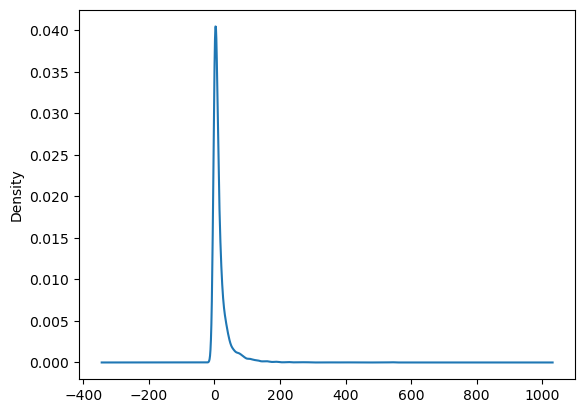

In [24]:
ax = df['solved hard'].plot(kind='kde')